In [1]:
import pyLIMA

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import csv

from pyLIMA.fits import DE_fit
from pyLIMA.fits import TRF_fit
from pyLIMA.models import PSPL_model
from pyLIMA.models import USBL_model, pyLIMA_fancy_parameters
from pyLIMA.outputs import pyLIMA_plots

from pyLIMA import event
from pyLIMA import telescopes

In [3]:
your_event = event.Event(ra=262.75616,dec=-21.40123)
your_event.name = 'Gaia21bsg'

In [4]:
data_1 = np.loadtxt('data/star_20957_Gaia21bsg_fs01_ip_reduced.dat')
telescope_1 = telescopes.Telescope(name='Gaia_20957_i',
                                  camera_filter = 'I',
                                  light_curve = data_1.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

data_2 = np.loadtxt('data/star_50085_Gaia21bsg_gp_reduced.dat')
telescope_2 = telescopes.Telescope(name='Gaia__50085_g',
                                  camera_filter = 'G',
                                  light_curve = data_2.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

data_3 = np.loadtxt('data/star_79874_Gaia21bsg_ip_reduced.dat')
telescope_3 = telescopes.Telescope(name='Gaia_79874_i',
                                  camera_filter = 'I',
                                  light_curve = data_3.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [ ]:
#plt.plot(data_3[:,0],data_3[:,1])

In [5]:
data_4 = np.loadtxt('data/atlas_c_filter.dat',delimiter=',')   # will need to use func to convert to HDJD
#data_4[:,0] = data_4[:,0] + 2.4e6
telescope_4 = telescopes.Telescope(name='ATLAS_c',
                                  camera_filter = 'C',
                                  light_curve = data_4.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [ ]:
#plt.plot(data_4[:,0],data_4[:,1],'o')

In [6]:
data_5 = np.loadtxt('data/atlas_o_filter.dat',delimiter=',')   # will need to use func to convert to HJD
#data_5[:,0] = data_5[:,0] + 2.4e6
telescope_5 = telescopes.Telescope(name='ATLAS_o',
                                  camera_filter = 'O',
                                  light_curve = data_5.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [ ]:
#plt.plot(data_4[:,0],data_4[:,1])

In [7]:
data_6 = np.loadtxt('data/ztf_gaiabsg21_reduced.dat',delimiter=',')   # will need to use func to convert HJD
#data_6[:,0] = data_6[:,0] + 2.4e6
telescope_6 = telescopes.Telescope(name='ZTF_r',
                                  camera_filter = 'R',
                                  light_curve = data_6.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [ ]:
#plt.plot(data_5[:,0],data_5[:,1])

In [8]:
data_7 = np.loadtxt('data/reduced_gaia_data.dat',delimiter=',')    # will need to use func to convert HJD
#data_7[:,0] = data_7[:,0] + 2.4e6
telescope_7 = telescopes.Telescope(name='Gaia_g',
                                  camera_filter = 'G',
                                  light_curve = data_7.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD', 'mag','mag'])

# object id found via ztf: 281216400001763

In [9]:
your_event.telescopes.append(telescope_1)
your_event.telescopes.append(telescope_2)
your_event.telescopes.append(telescope_3)
your_event.telescopes.append(telescope_4)
your_event.telescopes.append(telescope_5)
your_event.telescopes.append(telescope_6)
your_event.telescopes.append(telescope_7)

In [10]:
your_event.find_survey('Gaia')

In [11]:
your_event.check_event()

check_event  : Everything looks fine...


In [12]:
from pyLIMA.models import PSPL_model
pspl = PSPL_model.PSPLmodel(your_event)

In [13]:
from pyLIMA.fits import DE_fit

In [14]:
my_fit = DE_fit.DEfit(pspl)

In [15]:
my_fit.fit_parameters

OrderedDict([('t0', [0, (2457269.24643064, 2460120.4238806)]),
             ('u0', [1, (0.0, 1.0)]),
             ('tE', [2, (0.1, 500)])])

In [16]:
my_fit.fit()

DE converge to objective function : f(x) =  73971.2645012842
DE converge to parameters : =  ['2459353.871609659' '0.9998777230075914' '1.1226707765404456']
fit  : Differential Evolution fit SUCCESS
best_model: [2.45935387e+06 9.99877723e-01 1.12267078e+00] -ln(likelihood) 73971.2645012842


In [17]:
my_fit.fit_results

{'best_model': array([2.45935387e+06, 9.99877723e-01, 1.12267078e+00]),
 '-(ln_likelihood)': 73971.2645012842,
 'fit_time': 9.009024858474731,
 'DE_population': array([[ 2.45955442e+06,  2.71253367e-01,  2.49672143e+02, ...,
          2.85159649e+02,  1.16645572e+03,  1.53541639e+05],
        [ 2.45830830e+06,  6.75099896e-01,  1.91706915e+02, ...,
         -3.42869703e+02,  1.88671175e+03,  1.57222905e+05],
        [ 2.45888868e+06,  2.06249462e-02,  1.40633723e+02, ...,
         -1.64928591e+01,  1.53750608e+03,  1.58629982e+05],
        ...,
        [ 2.45935387e+06,  3.69061047e-01,  1.12347816e+00, ...,
          8.14917672e+09, -8.14917531e+09,  8.26948327e+04],
        [ 2.45935387e+06,  4.48682365e-01,  1.13195440e+00, ...,
          7.90693692e+09, -7.90693551e+09,  7.99222349e+04],
        [ 2.45935387e+06,  9.95155538e-01,  1.12869355e+00, ...,
          8.00846535e+09, -8.00846394e+09,  7.39744294e+04]])}

In [18]:
my_fit.fit_results['best_model']

array([2.45935387e+06, 9.99877723e-01, 1.12267078e+00])

In [19]:
my_fit.fit_parameters.keys()

odict_keys(['t0', 'u0', 'tE'])

<IPython.core.display.Javascript object>


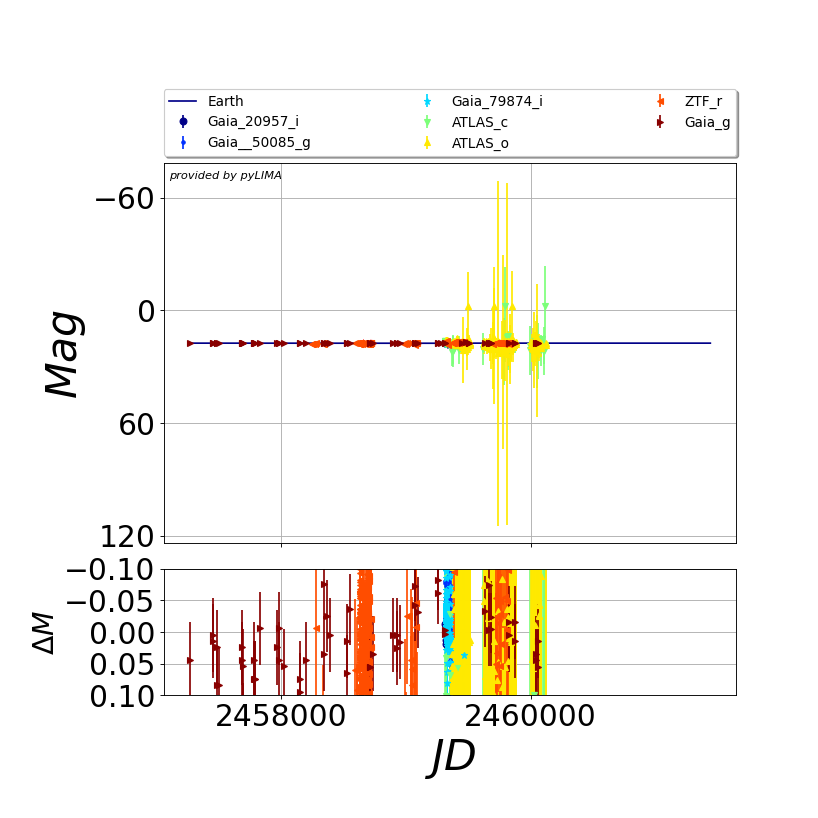

/home/ezequiel/pyLIMA-env/pyLIMA/pyLIMA/outputs/pyLIMA_plots.py:1017: RuntimeWarning: invalid value encountered in log10
  np.log10(ref_source * magni + ref_blend)
/home/ezequiel/pyLIMA-env/pyLIMA/pyLIMA/outputs/pyLIMA_plots.py:1112: RuntimeWarning: invalid value encountered in log10
  np.log10(model_flux)


In [20]:
from pyLIMA.outputs import pyLIMA_plots
pyLIMA_plots.plot_lightcurves(pspl,my_fit.fit_results['best_model'])
plt.show()

In [21]:
from pyLIMA.fits import LM_fit

In [22]:
my_fit2 = LM_fit.LMfit(pspl)

In [23]:
my_fit2.fit()

initial_guess  : Initial parameters guess SUCCESS
Using guess:  [2459346.5994219277, 1.0, 20.0, 8967.818203053135, 0.0, 555.7292324338752, 0.0, 2883.891295418017, 0.0, 91201083935.59077, 3436.2068724174833, 43381.621794485574, -42653.88846469163, 5764.557824945484, 0.0, 9204.495717531712, 0.0]
fit  : Levenberg-Marquardt fit SUCCESS
best_model: [2459344.495614748, 0.13308024925664663, 112.33394243958419, -1426.1939060003092, 14618.974516194408, 21.5495351902832, 188.26007892052525, 106.68993712644915, 819.3961029362189, -5.613683247240462, 1226.3367424952842, 631.7044428419817, 48.880122568653775, 441.2723637880916, 798.5031923023513, 2698.9723137872984, -1362.3284272707165]  chi2: 261816.16528113364


In [24]:
my_fit2.fit_results

{'best_model': [2459344.495614748,
  0.13308024925664663,
  112.33394243958419,
  -1426.1939060003092,
  14618.974516194408,
  21.5495351902832,
  188.26007892052525,
  106.68993712644915,
  819.3961029362189,
  -5.613683247240462,
  1226.3367424952842,
  631.7044428419817,
  48.880122568653775,
  441.2723637880916,
  798.5031923023513,
  2698.9723137872984,
  -1362.3284272707165],
 'chi2': 261816.16528113364,
 'fit_time': 0.7697114944458008,
 'covariance_matrix': array([[ 1.04213761e+00,  3.81954815e-03,  1.78352613e+00,
         -1.07876827e+02,  2.82549254e+02, -2.13717903e-01,
          1.86440733e+00, -1.22392647e+00,  1.26362470e+01,
          1.11864516e-02,  9.06208660e-02, -2.03068854e-01,
         -7.34379444e+00,  1.94989222e+00, -3.13998794e+00,
          3.87917810e+01, -4.23782522e+01],
        [ 3.81954815e-03,  1.21115324e-02, -8.93706582e+00,
         -1.33830028e+02,  8.52574794e+01,  2.15729473e+00,
         -1.84262121e+00,  1.06840372e+01, -9.24278907e+00,
        

In [25]:
my_fit2.fit_results['best_model']

[2459344.495614748,
 0.13308024925664663,
 112.33394243958419,
 -1426.1939060003092,
 14618.974516194408,
 21.5495351902832,
 188.26007892052525,
 106.68993712644915,
 819.3961029362189,
 -5.613683247240462,
 1226.3367424952842,
 631.7044428419817,
 48.880122568653775,
 441.2723637880916,
 798.5031923023513,
 2698.9723137872984,
 -1362.3284272707165]

In [26]:
my_fit2.fit_parameters.keys()

odict_keys(['t0', 'u0', 'tE', 'fsource_Gaia_20957_i', 'fblend_Gaia_20957_i', 'fsource_Gaia__50085_g', 'fblend_Gaia__50085_g', 'fsource_Gaia_79874_i', 'fblend_Gaia_79874_i', 'fsource_ATLAS_c', 'fblend_ATLAS_c', 'fsource_ATLAS_o', 'fblend_ATLAS_o', 'fsource_ZTF_r', 'fblend_ZTF_r', 'fsource_Gaia_g', 'fblend_Gaia_g'])

<IPython.core.display.Javascript object>


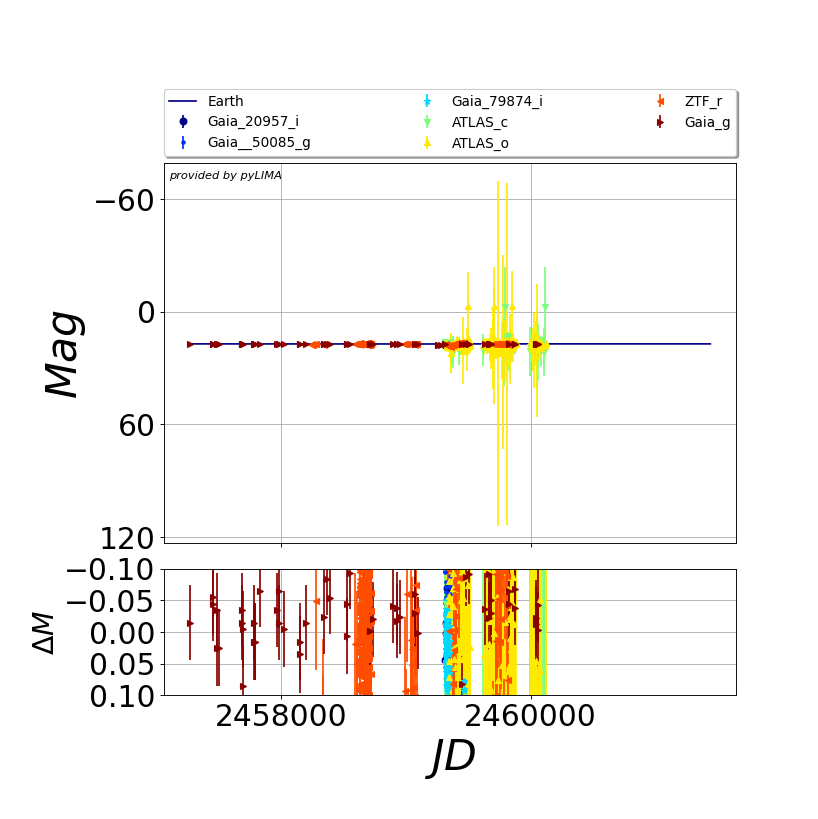

In [27]:
pyLIMA_plots.plot_lightcurves(pspl,my_fit2.fit_results['best_model'])
plt.savefig('output1.png')
plt.show()